In [20]:
import json
import cobra
from escher import Builder
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.set_context('notebook', font_scale = 1.5, rc = {'lines.linewidth' : 2.5})
plt.style.use('fivethirtyeight')
from cobra import Model, Reaction, Metabolite
%matplotlib inline

In [21]:
ecoli_core = cobra.io.read_sbml_model('./e_coli_core.xml')

In [22]:
ecoli_core_model = ecoli_core.copy()

In [23]:
print(len(ecoli_core.reactions)) #Number of reaction
print(len(ecoli_core.metabolites))
print(len(ecoli_core.genes))
print(ecoli_core.medium) #Thinks e coli can uptake millimolar per dry weight per hour

95
72
137
{'EX_co2_e': 1000.0, 'EX_glc__D_e': 10.0, 'EX_h_e': 1000.0, 'EX_h2o_e': 1000.0, 'EX_nh4_e': 1000.0, 'EX_o2_e': 1000.0, 'EX_pi_e': 1000.0}


In [24]:
print(ecoli_core.objective)
obj_fnc = ecoli_core.reactions.get_by_id('BIOMASS_Ecoli_core_w_GAM')
print(obj_fnc.reaction)

Maximize
1.0*BIOMASS_Ecoli_core_w_GAM - 1.0*BIOMASS_Ecoli_core_w_GAM_reverse_712e5
1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c


In [25]:
ecoli_core.reactions.EX_o2_e.bounds = [0,1000]
ecoli_core.reactions.EX_glc__D_e.bounds = [0, 1000]
ecoli_core.reactions.EX_fru_e.bounds = [-20, 1000]
display(ecoli_core.reactions.EX_o2_e)
display(ecoli_core.reactions.EX_glc__D_e)
display(ecoli_core.reactions.EX_fru_e)

Reaction identifier,EX_o2_e
Name,O2 exchange
Memory address,0x12db28d5850
Stoichiometry,o2_e --> O2 O2 -->
GPR,
Lower bound,0
Upper bound,1000


Reaction identifier,EX_glc__D_e
Name,D-Glucose exchange
Memory address,0x12db28cbf40
Stoichiometry,glc__D_e --> D-Glucose -->
GPR,
Lower bound,0
Upper bound,1000


Reaction identifier,EX_fru_e
Name,D-Fructose exchange
Memory address,0x12db28cb610
Stoichiometry,fru_e <=> D-Fructose <=>
GPR,
Lower bound,-20
Upper bound,1000


In [26]:
solution = ecoli_core.optimize()
display(solution)

,fluxes,reduced_costs
PFK,19.486482,0.000000e+00
PFL,34.645519,-2.775558e-17
PGI,-0.105832,-2.775558e-17
PGK,-38.627643,-0.000000e+00
PGL,0.000000,-4.615013e-03
...,...,...
NADH16,0.000000,-2.215206e-02
NADTRHD,0.000000,-1.107603e-02
NH4t,2.815029,0.000000e+00
O2t,0.000000,-1.387779e-17


In [34]:
object_values=[]
for i in range(-1000, -1):
    print(i)
    ecoli_core.reactions.EX_fru_e.bounds = [i, 1000]
    solution = ecoli_core.optimize()
    print("Concentration {} objective value: {}".format(i, solution.objective_value))
    object_values.append(solution.objective_value)

-1000
Concentration -1000 objective value: 15.712773242236194
-999
Concentration -999 objective value: 15.712773242236194
-998
Concentration -998 objective value: 15.712773242236194
-997
Concentration -997 objective value: 15.712773242236194
-996
Concentration -996 objective value: 15.712773242236194
-995
Concentration -995 objective value: 15.712773242236194
-994
Concentration -994 objective value: 15.712773242236194
-993
Concentration -993 objective value: 15.712773242236194
-992
Concentration -992 objective value: 15.712773242236194
-991
Concentration -991 objective value: 15.712773242236194
-990
Concentration -990 objective value: 15.712773242236194
-989
Concentration -989 objective value: 15.712773242236194
-988
Concentration -988 objective value: 15.712773242236194
-987
Concentration -987 objective value: 15.712773242236194
-986
Concentration -986 objective value: 15.712773242236194
-985
Concentration -985 objective value: 15.712773242236194
-984
Concentration -984 objective valu

Concentration -834 objective value: 15.712773242236194
-833
Concentration -833 objective value: 15.712773242236194
-832
Concentration -832 objective value: 15.712773242236194
-831
Concentration -831 objective value: 15.712773242236194
-830
Concentration -830 objective value: 15.712773242236194
-829
Concentration -829 objective value: 15.712773242236194
-828
Concentration -828 objective value: 15.712773242236194
-827
Concentration -827 objective value: 15.712773242236194
-826
Concentration -826 objective value: 15.712773242236194
-825
Concentration -825 objective value: 15.712773242236194
-824
Concentration -824 objective value: 15.712773242236194
-823
Concentration -823 objective value: 15.712773242236194
-822
Concentration -822 objective value: 15.712773242236194
-821
Concentration -821 objective value: 15.712773242236194
-820
Concentration -820 objective value: 15.712773242236194
-819
Concentration -819 objective value: 15.712773242236194
-818
Concentration -818 objective value: 15.7

Concentration -690 objective value: 15.712773242236194
-689
Concentration -689 objective value: 15.712773242236194
-688
Concentration -688 objective value: 15.712773242236194
-687
Concentration -687 objective value: 15.712773242236194
-686
Concentration -686 objective value: 15.712773242236194
-685
Concentration -685 objective value: 15.712773242236194
-684
Concentration -684 objective value: 15.712773242236194
-683
Concentration -683 objective value: 15.712773242236194
-682
Concentration -682 objective value: 15.712773242236194
-681
Concentration -681 objective value: 15.712773242236194
-680
Concentration -680 objective value: 15.712773242236194
-679
Concentration -679 objective value: 15.712773242236194
-678
Concentration -678 objective value: 15.712773242236194
-677
Concentration -677 objective value: 15.712773242236194
-676
Concentration -676 objective value: 15.712773242236194
-675
Concentration -675 objective value: 15.712773242236194
-674
Concentration -674 objective value: 15.7

Concentration -526 objective value: 15.326843737770316
-525
Concentration -525 objective value: 15.3045816106853
-524
Concentration -524 objective value: 15.282319483600268
-523
Concentration -523 objective value: 15.26005735651525
-522
Concentration -522 objective value: 15.237795229430228
-521
Concentration -521 objective value: 15.215533102345203
-520
Concentration -520 objective value: 15.192198438545951
-519
Concentration -519 objective value: 15.164575121151259
-518
Concentration -518 objective value: 15.136951803756585
-517
Concentration -517 objective value: 15.109328486361902
-516
Concentration -516 objective value: 15.081705168967236
-515
Concentration -515 objective value: 15.054081851572537
-514
Concentration -514 objective value: 15.026458534177863
-513
Concentration -513 objective value: 14.998835216783188
-512
Concentration -512 objective value: 14.97121189938851
-511
Concentration -511 objective value: 14.943588581993827
-510
Concentration -510 objective value: 14.91596

Concentration -365 objective value: 10.910584242370671
-364
Concentration -364 objective value: 10.88296092497599
-363
Concentration -363 objective value: 10.85533760758131
-362
Concentration -362 objective value: 10.827714290186632
-361
Concentration -361 objective value: 10.800090972791955
-360
Concentration -360 objective value: 10.772467655397271
-359
Concentration -359 objective value: 10.744844338002595
-358
Concentration -358 objective value: 10.717221020607914
-357
Concentration -357 objective value: 10.689597703213234
-356
Concentration -356 objective value: 10.661974385818556
-355
Concentration -355 objective value: 10.634351068423875
-354
Concentration -354 objective value: 10.606727751029199
-353
Concentration -353 objective value: 10.579104433634518
-352
Concentration -352 objective value: 10.551481116239842
-351
Concentration -351 objective value: 10.52385779884516
-350
Concentration -350 objective value: 10.496234481450482
-349
Concentration -349 objective value: 10.4686

Concentration -225 objective value: 6.760366195732369
-224
Concentration -224 objective value: 6.72990711086721
-223
Concentration -223 objective value: 6.699448026002155
-222
Concentration -222 objective value: 6.668988941137038
-221
Concentration -221 objective value: 6.638529856271889
-220
Concentration -220 objective value: 6.608070771406814
-219
Concentration -219 objective value: 6.577611686541698
-218
Concentration -218 objective value: 6.5471526016765855
-217
Concentration -217 objective value: 6.516693516811503
-216
Concentration -216 objective value: 6.486234431946404
-215
Concentration -215 objective value: 6.455775347081269
-214
Concentration -214 objective value: 6.42531626221619
-213
Concentration -213 objective value: 6.394857177351078
-212
Concentration -212 objective value: 6.36439809248598
-211
Concentration -211 objective value: 6.333939007620879
-210
Concentration -210 objective value: 6.3034799227557645
-209
Concentration -209 objective value: 6.2730208378906624
-2

Concentration -52 objective value: 1.4909445140695994
-51
Concentration -51 objective value: 1.4604854292045029
-50
Concentration -50 objective value: 1.430026344339399
-49
Concentration -49 objective value: 1.3995672594742976
-48
Concentration -48 objective value: 1.3691081746092095
-47
Concentration -47 objective value: 1.3386490897440952
-46
Concentration -46 objective value: 1.3081900048789998
-45
Concentration -45 objective value: 1.2777309200138902
-44
Concentration -44 objective value: 1.2472718351487877
-43
Concentration -43 objective value: 1.2168127502836945
-42
Concentration -42 objective value: 1.1863536654185776
-41
Concentration -41 objective value: 1.1558945805534884
-40
Concentration -40 objective value: 1.1254354956883834
-39
Concentration -39 objective value: 1.0949764108232796
-38
Concentration -38 objective value: 1.0645173259581795
-37
Concentration -37 objective value: 1.0340582410930688
-36
Concentration -36 objective value: 1.0035991562279687
-35
Concentration -

C:\Users\Giacomo Lora\Desktop\Progettini PY\MGE\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
C:\Users\Giacomo Lora\Desktop\Progettini PY\MGE\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


(array([ 52.,  52.,  51.,  52.,  52.,  52.,  55.,  57.,  57., 519.]),
 array([-0.03781094,  1.53724748,  3.11230589,  4.68736431,  6.26242273,
         7.83748115,  9.41253957, 10.98759799, 12.56265641, 14.13771482,
        15.71277324]),
 <BarContainer object of 10 artists>)

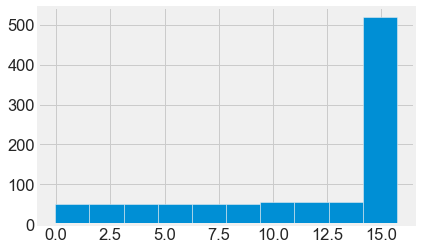

In [42]:
#plt.plot(range(-1000,-1),object_values)
plt.hist(object_values)

In [28]:
# save model in JSON to communicate with escher viewer and create the new map
# TO UPLOAD AND VISUALIZE RESULTS ON ESCHER (https://escher.github.io/).
cobra.io.save_json_model(ecoli_core_model, 'ecoli_core_model.json')
with open('ecoli_core_EX_glc__D_e_reactions.json', 'w') as outfile:  
    json.dump(solution.fluxes.to_dict(), outfile)
with open('ecoli_core_EX_glc__D_e_metabolites.json', 'w') as outfile:  
    json.dump(solution.shadow_prices.to_dict(), outfile)
# END JSON CREATION

# save model in JSON to communicate with escher viewer and create the new map
# TO WRITE JSON --> cobra.io.write_sbml_model(emodel, "model.xml")
cobra.io.save_json_model(ecoli_core_model, 'ecoli_core_model_ver1.json')

In [29]:
import escher
import escher.urls
def draw_map(model, solution):
            b = Builder(map_json="./ecoli_core_model.Core metabolism.json" ,# Change with the path on your PC.
            model=model,
            reaction_data=solution.fluxes.to_dict(),
            reaction_scale=[{'type': 'min', 'color': '#cccccc', 'size': 4},
                                   {'type': 'mean', 'color': '#0000dd', 'size': 20},
                                   {'type': 'max', 'color': '#ff0000', 'size': 40}],
            metabolite_data=solution.shadow_prices.to_dict(),
            hide_secondary_metabolites=False)

            return b

In [30]:
draw_map(ecoli_core, solution)

ValueError: Could not load map_json. Not valid json, url, or filepath